In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm,t
import statsmodels as sm
import warnings
from sklearn.metrics import confusion_matrix, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
#from sklearn.preprocessing import train
warnings.filterwarnings('ignore')

### Scenario 2: House price prediction
    You are provided with the california housing dataset. Based on the given parameters of a house predict
    its price.
    Dataset Description:
    The dataset contains 9 features:
    
    longitude: A measure of how far west a house is; a higher value is farther west
    latitude: A measure of how far north a house is; a higher value is farther north
    housingMedianAge: Median age of a house within a block; a lower number is a newer
    building
    totalRooms: Total number of rooms within a block
    totalBedrooms: Total number of bedrooms within a block
    population: Total number of people residing within a block
    households: Total number of households, a group of people residing within a home unit,
    for a block
    medianIncome: Median income for households within a block of houses (measured in
    tens of thousands of US Dollars)
    medianHouseValue: Median house value for households within a block (measured in US
    Dollars)
    Tasks to be performed:
    1. Load the data, check its shape and check for null values - Beginner
    2. Split the dataset for training and testing - Beginner
    3. Train the model using sklearn - Beginner
    4. Predict the prices on test data and evaluate the model - Beginner
    5. Find coefficient and intercept using the trained model - Beginner

In [2]:
df = pd.read_csv('california_housing_train.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [4]:
print(f'Shape of the data: {df.shape}')

Shape of the data: (17000, 9)


In [5]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

X_train shape: (11900, 8), X_test shape: (5100, 8)
y_train shape: (11900,), y_test shape: (5100,)


In [7]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
result = lr.fit(X_train, y_train)

In [33]:
print(f"Coeff: {result.coef_}, \nintercept: {result.intercept_}")

Coeff: [-4.30311368e+04 -4.28120652e+04  1.12638800e+03 -9.04752196e+00
  1.11544763e+02 -3.34636754e+01  4.21766289e+01  4.02003941e+04], 
intercept: -3611013.5599230817


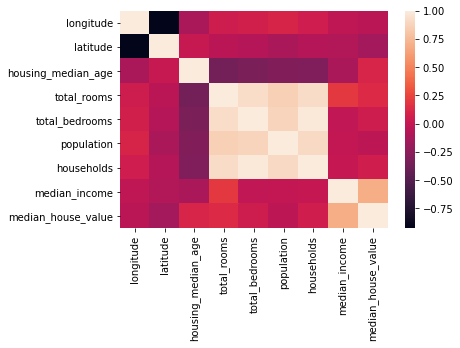

In [11]:
sns.heatmap(df.corr())
plt.show()

In [18]:
#for column in df.select_dtypes(exclude=['object']).columns[:-1]:
#    sns.scatterplot(data=df, x=df[column], y=df['median_house_value'])
#    plt.xlabel(column)
#    plt.ylabel('median house value')
#    plt.show()

In [20]:
result.score(X_train, y_train)

0.636355383535472

In [21]:
result.score(X_test, y_test)

0.650233476195129

In [24]:
y_pred = result.predict(X_test)
y_pred[:5]

array([143299.98653716, 398200.33928601,  87251.79240167, 149828.45701402,
       147243.85155727])

In [25]:
r2_score(y_test, y_pred)

0.650233476195129

In [27]:
mean_absolute_error(y_test, y_pred)

50966.66000518884

In [30]:
sum(abs(y_test - y_pred))/y_test.shape[0]

50966.66000518883

In [32]:
mean_absolute_percentage_error(y_test, y_pred)

0.2967648975478511